# Data Preprocessing
# Project: Crude Oil Price Prediction
# Team ID : PNT2022TMID44916
# Creating a Dataset with Sliding Windows
# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [8]:
data=pd.read_csv("/content/Crude Oil Prices Daily (2).csv")

# Handling Missing Data

In [9]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [10]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [11]:
data.dropna(axis=0,inplace=True)

In [12]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [13]:
data_oil=data.reset_index()['Closing Value']
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [15]:
data_oil

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

# Data Visualisation using matplotlibrary.pyp plotting

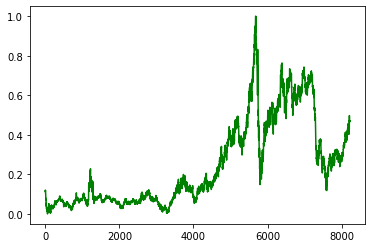

In [16]:
plt.plot(data_oil,'g-')


In [17]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [18]:
training_size,test_size

(5340, 2876)

In [19]:
train_data.shape

(5340, 1)

# Creating A Dataset With Sliding Windows

In [20]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

# Reshape into x=t, t+1, t+2, t+3 and Y=t+4

In [21]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

## Shape of training data

In [22]:
print(x_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

# Shape of test data

In [23]:
print(x_test.shape),print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

Data of X_train



In [24]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

# Reshape the X_train and X_test

In [25]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)